<a href="https://colab.research.google.com/github/PoojaDoctor/Data144-FinalProject/blob/aubrey_data_exploration/CONDOR_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from nltk.cluster import KMeansClusterer
from nltk import FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('drive/My Drive/ted_main.csv')
df_transcript = pd.read_csv('drive/My Drive/transcripts.csv')
cleaned = pd.read_csv('drive/My Drive/cleaned.csv')
title_embeddings = pd.read_csv('drive/My Drive/sentence_embeddingsNEW.csv')

In [0]:
title_embeddings.drop(columns={'Unnamed: 0'}, inplace=True)

In [0]:
title_embeddings_array = title_embeddings.to_numpy()
title_embeddings_list = [x for x in title_embeddings_array]

In [0]:
descriptions = [x for x in cleaned['description']]
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(descriptions)]
model = Doc2Vec(documents, vector_size=50, window=2, min_count=1, workers=4)
tags = list(range(0, len(documents)))
vector_list = model[tags]

In [0]:
data_embed1 = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list)

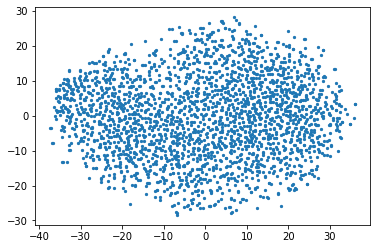

In [10]:
# plot the reduced vectors
def twod_plot(embeddings):
  x_axis = embeddings[:, 0]
  y_axis = embeddings[:, 1]
  plt.scatter(x_axis, y_axis, s=5)
  plt.show()

twod_plot(data_embed1)

In [11]:
data_embed2 = TSNE(n_components=3, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2467 samples in 0.008s...
[t-SNE] Computed neighbors for 2467 samples in 0.760s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2467
[t-SNE] Computed conditional probabilities for sample 2000 / 2467
[t-SNE] Computed conditional probabilities for sample 2467 / 2467
[t-SNE] Mean sigma: 0.067417
[t-SNE] Computed conditional probabilities in 0.244s
[t-SNE] Iteration 50: error = 72.8437881, gradient norm = 0.0234071 (50 iterations in 14.808s)
[t-SNE] Iteration 100: error = 72.8402252, gradient norm = 0.0112786 (50 iterations in 17.384s)
[t-SNE] Iteration 150: error = 72.8422012, gradient norm = 0.0186536 (50 iterations in 13.795s)
[t-SNE] Iteration 200: error = 72.8397522, gradient norm = 0.0079588 (50 iterations in 15.226s)
[t-SNE] Iteration 250: error = 72.8416824, gradient norm = 0.0169044 (50 iterations in 12.880s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.841682
[t-SNE] Iteration 300

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


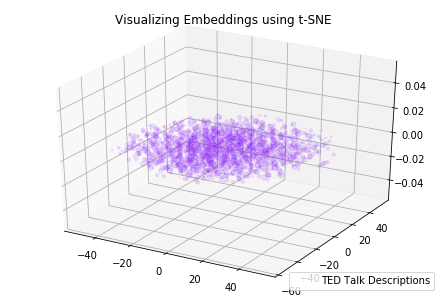

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import numpy as np 

def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()

tsne_plot_3d('Visualizing Embeddings using t-SNE', 'TED Talk Descriptions', data_embed2, a=0.1)


In [20]:
titles[:10]

['Do schools kill creativity?',
 'Averting the climate crisis',
 'Simplicity sells',
 'Greening the ghetto',
 "The best stats you've ever seen",
 'Why we do what we do',
 'Letting go of God',
 "Behind the design of Seattle's library",
 "Let's teach religion -- all religion -- in schools",
 'A life of purpose']

In [0]:
# looking at titles now
titles = [x for x in cleaned['title']]
documents_title = [TaggedDocument(doc, [i]) for i, doc in enumerate(titles)]
model_title = Doc2Vec(documents_title, vector_size=30, window=2, min_count=1, workers=4)
tags_title = list(range(0, len(documents_title)))
vector_list_title = model_title[tags_title]

In [14]:
twod_titles = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list_title)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2467 samples in 0.003s...
[t-SNE] Computed neighbors for 2467 samples in 0.429s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2467
[t-SNE] Computed conditional probabilities for sample 2000 / 2467
[t-SNE] Computed conditional probabilities for sample 2467 / 2467
[t-SNE] Mean sigma: 0.020803
[t-SNE] Computed conditional probabilities in 0.278s
[t-SNE] Iteration 50: error = 73.9876556, gradient norm = 0.0797665 (50 iterations in 1.544s)
[t-SNE] Iteration 100: error = 69.4462128, gradient norm = 0.0283882 (50 iterations in 0.972s)
[t-SNE] Iteration 150: error = 69.4127884, gradient norm = 0.0225388 (50 iterations in 0.765s)
[t-SNE] Iteration 200: error = 69.4082947, gradient norm = 0.0174971 (50 iterations in 0.767s)
[t-SNE] Iteration 250: error = 69.4093704, gradient norm = 0.0143004 (50 iterations in 0.699s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.409370
[t-SNE] Iteration 300: err

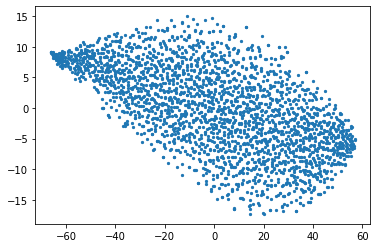

In [25]:
twod_plot(twod_titles)

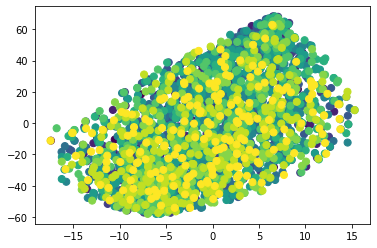

In [22]:
#color plot with.. year?
years = cleaned['yr']
plt.scatter(twod_titles[:, 0], twod_titles[:, 1], c=years, s=50, cmap='viridis')

In [0]:
threed_titles = TSNE(n_components=3, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list_title)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


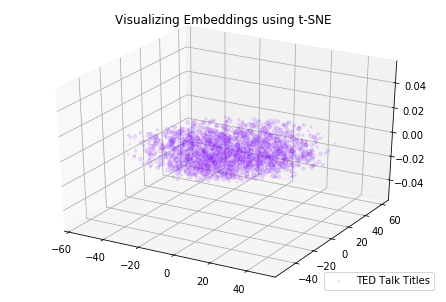

In [23]:
tsne_plot_3d('Visualizing Embeddings using t-SNE', 'TED Talk Titles', data_embed2, a=0.1)

In [0]:
# looking at the whole transcript now
transcripts = [x for x in df_transcript['transcript']]

documents_transcripts = [TaggedDocument(doc, [i]) for i, doc in enumerate(transcripts)]
model_transcripts = Doc2Vec(documents_transcripts, vector_size=50, window=2, min_count=1, workers=4)
tags_transcripts = list(range(0, len(documents_transcripts)))
vector_list_transcripts = model_transcripts[tags_transcripts]
# reduce dim
data_embed_transcripts = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list_transcripts)

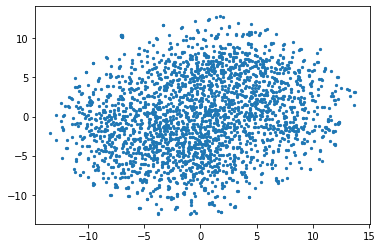

In [28]:
twod_plot(data_embed_transcripts)

In [0]:
threed_transcripts = TSNE(n_components=3, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list_transcripts)
tsne_plot_3d('Visualizing Embeddings using t-SNE', 'TED Talk Transcripts', threed_transcripts, a=0.1)

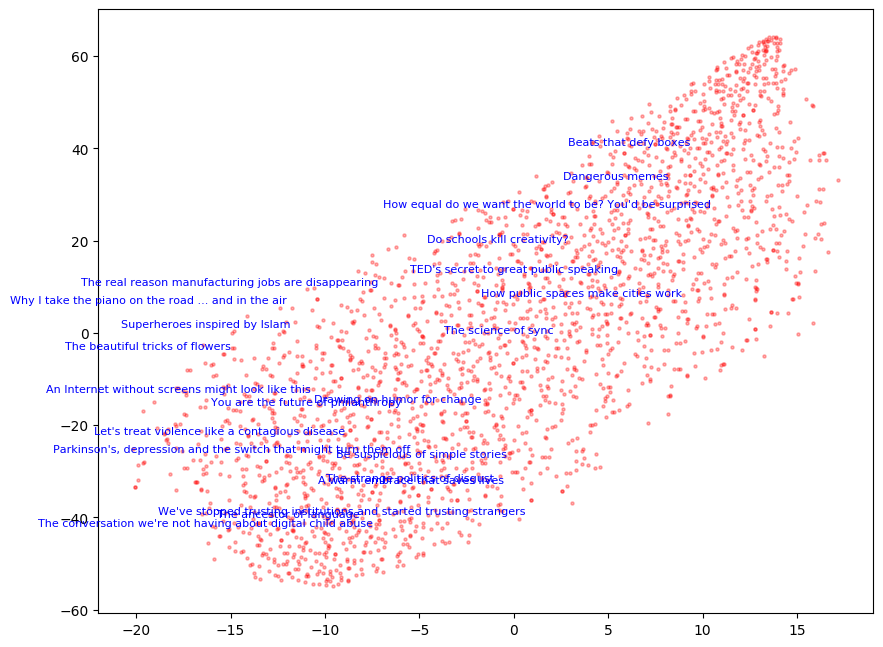

In [61]:
import re
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')

labels_clean = [re.sub(r'\W+', '', x) for x in titles]

x_axis = twod_titles[:, 0]
y_axis = twod_titles[:, 1]
plt.scatter(x_axis, y_axis, s=5, c='red', alpha=.3)

for i, word in enumerate(titles):
    if i % 117 == 0:
      plt.annotate(word, alpha=1, xy=(x_axis[i], y_axis[i]), xytext=(5, 2), color='blue',
                  textcoords='offset points', ha='right', va='bottom', size=8)

In [7]:
#try to find three most similar titles maybe??
cleaned['yr'].value_counts()
print(len(cleaned), len(df))

2467 2550


In [64]:
sims = model_title.docvecs.most_similar([model_title[200]])
print(sims)

sims2 = model_title.docvecs.most_similar([model_title[460]])
print(sims2)

[(200, 0.9999999403953552), (1406, 0.9866195917129517), (197, 0.9864475727081299), (101, 0.9847503304481506), (218, 0.983551025390625), (1547, 0.9831313490867615), (760, 0.9829812049865723), (93, 0.9829665422439575), (1688, 0.9827031493186951), (761, 0.9824166297912598)]
[(460, 0.9999998807907104), (2452, 0.8205567002296448), (1752, 0.782554566860199), (814, 0.780613124370575), (660, 0.7795622944831848), (1693, 0.775571346282959), (1864, 0.7704707384109497), (61, 0.7683106064796448), (2052, 0.7667418122291565), (1128, 0.766312301158905)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [65]:
print(documents_title[200], documents_title[272])
print(documents_title[91], documents_title[96])
print(documents_title[218], documents_title[1547])

print(documents_title[460], documents_title[2452])
print(documents_title[1752], documents_title[814])
print(documents_title[660], documents_title[1693])

TaggedDocument(My wish: Once Upon a School, [200]) TaggedDocument("The Dog Song", [272])
TaggedDocument(A mockingbird remix of TED2006, [91]) TaggedDocument(A comic sendup of TED2006, [96])
TaggedDocument(Wake up! It's They Might Be Giants!, [218]) TaggedDocument(Massively multi-player… thumb-wrestling?, [1547])
TaggedDocument(Learning from the gecko's tail, [460]) TaggedDocument(Who belongs in a city?, [2452])
TaggedDocument(The career advice you probably didn’t get, [1752]) TaggedDocument(The economic injustice of plastic, [814])
TaggedDocument(Pay attention to penguins, [660]) TaggedDocument(Why your worst deeds don’t define you, [1693])


In [9]:
twod_embed_titles = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(title_embeddings_list)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2467 samples in 0.056s...
[t-SNE] Computed neighbors for 2467 samples in 8.700s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2467
[t-SNE] Computed conditional probabilities for sample 2000 / 2467
[t-SNE] Computed conditional probabilities for sample 2467 / 2467
[t-SNE] Mean sigma: 1.834398
[t-SNE] Computed conditional probabilities in 0.212s
[t-SNE] Iteration 50: error = 72.9682007, gradient norm = 0.0965462 (50 iterations in 2.286s)
[t-SNE] Iteration 100: error = 72.9245758, gradient norm = 0.0986999 (50 iterations in 1.680s)
[t-SNE] Iteration 150: error = 72.9149933, gradient norm = 0.0983329 (50 iterations in 1.781s)
[t-SNE] Iteration 200: error = 73.3281708, gradient norm = 0.0891710 (50 iterations in 2.063s)
[t-SNE] Iteration 250: error = 73.3659668, gradient norm = 0.1061281 (50 iterations in 2.362s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.365967
[t-SNE] Iteration 300: err

In [9]:
twod_plot(twod_embed_titles)

NameError: ignored

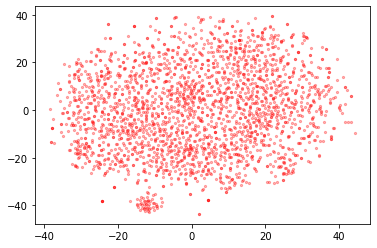

In [0]:
x_axis = twod_embed_titles[:, 0]
y_axis = twod_embed_titles[:, 1]
plt.scatter(x_axis, y_axis, s=5, c='red', alpha=.3)
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')

for i, word in enumerate(titles):
    if i % 117 == 0:
      plt.annotate(word, alpha=1, xy=(x_axis[i], y_axis[i]), xytext=(5, 2), color='blue',
                  textcoords='offset points', ha='right', va='bottom', size=8)

In [45]:
threed_embed_titles = TSNE(n_components=3, perplexity=50, verbose=2, method='barnes_hut').fit_transform(title_embeddings_list)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2467 samples in 0.053s...
[t-SNE] Computed neighbors for 2467 samples in 8.295s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2467
[t-SNE] Computed conditional probabilities for sample 2000 / 2467
[t-SNE] Computed conditional probabilities for sample 2467 / 2467
[t-SNE] Mean sigma: 1.834398
[t-SNE] Computed conditional probabilities in 0.188s
[t-SNE] Iteration 50: error = 72.6557083, gradient norm = 0.0382012 (50 iterations in 12.790s)
[t-SNE] Iteration 100: error = 72.6506577, gradient norm = 0.0297684 (50 iterations in 12.904s)
[t-SNE] Iteration 150: error = 72.6510315, gradient norm = 0.0293256 (50 iterations in 13.016s)
[t-SNE] Iteration 200: error = 72.6482391, gradient norm = 0.0230885 (50 iterations in 14.254s)
[t-SNE] Iteration 250: error = 72.6507874, gradient norm = 0.0300128 (50 iterations in 12.203s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.650787
[t-SNE] Iteration 300

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


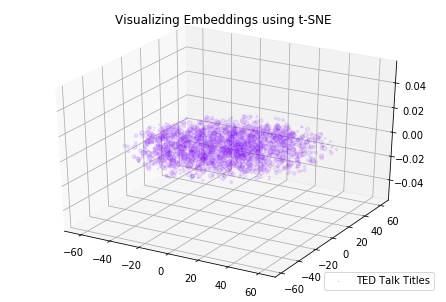

In [47]:
tsne_plot_3d('Visualizing Embeddings using t-SNE', 'TED Talk Titles', threed_embed_titles, a=0.1)

In [11]:
from sklearn.metrics import silhouette_score
def q1(title_embeddings_list):
  X = title_embeddings_list
  n_clusters_array = [3, 16, 18, 20, 15]
  result_array = []
  for cluster_number in n_clusters_array:
    kmeans = KMeansClusterer(cluster_number, distance=nltk.cluster.util.cosine_distance, repeats=25)
    cluster_labels = kmeans.cluster(X, assign_clusters=True)

    silhouette_avg = silhouette_score(X, cluster_labels)
    result_array.append((cluster_number, silhouette_avg))
  
  best_k = max(result_array,key=lambda item:item[1])[0]
  return result_array

q1(title_embeddings_list)

[(3, 0.03106954971121562),
 (16, 0.016359743316190098),
 (18, 0.016678334848198723),
 (20, 0.0169325864481366),
 (15, 0.013632074850327313)]

In [0]:
NUM_CLUSTERS = 3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters1 = kclusterer.cluster(title_embeddings_list, assign_clusters=True)


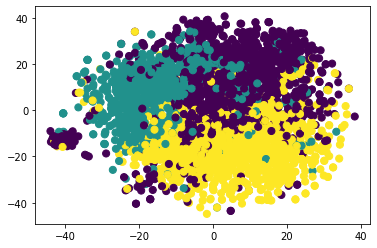

In [10]:
X1 = twod_embed_titles
plt.scatter(X1[:, 0], X1[:, 1], c=assigned_clusters1, s=50, cmap='viridis')

In [15]:
# look at the cluster labels with titles
#for item in zip(titles, assigned_clusters1):
#  print(item)

match_list = []
for i in range(0, len(titles)):
  match = (titles[i], assigned_clusters1[i])
  match_list.append(match)
match_list.sort(key=lambda x: x[1])
[x for x in match_list if x[1] == 2]

[('Simplicity sells', 2),
 ('Letting go of God', 2),
 ('A life of purpose', 2),
 ('Improvising on piano, aged 14', 2),
 ('Simple designs to save a life', 2),
 ('Organic design, inspired by nature', 2),
 ('Nerdcore comedy', 2),
 ('Meet the founder of the blog revolution', 2),
 ('Happiness in body and soul', 2),
 ('The freakonomics of crack dealing', 2),
 ('Choice, happiness and spaghetti sauce', 2),
 ('The surprising science of happiness', 2),
 ('My wish: Three actions for Africa', 2),
 ('My wish: Three unusual medical inventions', 2),
 ('Fight injustice with raw video', 2),
 ('8 secrets of success', 2),
 ('If I controlled the Internet', 2),
 ('The hidden world of shadow cities', 2),
 ('Dreams from endangered cultures', 2),
 ('Photos of endangered cultures', 2),
 ('How the "ghost map" helped end a killer disease', 2),
 ('Four American characters', 2),
 ('Everyday inventions', 2),
 ('In praise of slowness', 2),
 ('My wish: Rebuilding Rwanda', 2),
 ('My wish: Build the Encyclopedia of Lif

In [0]:
transcripts = [x for x in cleaned['transcript']]


def compute_freq(text_body, ngram_n=6):
    #stop_words = set(stopwords.words('english'))
    n_gramfdist = FreqDist()
    n_gram_list = []
    for line in text_body:
        if len(line) > 1:
            tokens = line.lower().replace('(laughter)', ' ').strip().split(' ')
            # tokens_without_stops = [x.lower() for x in tokens if x.lower() not in stop_words]
            # n_grams = ngrams(tokens_without_stops, 3)
            n_grams = ngrams(tokens, ngram_n)
            n_gram_list.append(n_grams)
            #n_gramfdist.update(n_grams)
    n_gramfdist(n_gram_list)
    return n_gramfdist


In [55]:
n_gramfdist = FreqDist()
n_gram_list = []
for line in transcripts[:10]:
  tokens = line.lower().replace('(laughter)', ' ').strip().split(' ')
  n_grams = ngrams(tokens, 6)
  n_gram_list.append(n_grams)
for item in n_gram_list:
  n_gramfdist.update(item)
n_gramfdist.most_common(20)

[(('they', 'said,', '"do', 'you', 'believe', 'that'), 3),
 (('every', 'time', 'you', 'read', 'it', 'or'), 3),
 (('time', 'you', 'read', 'it', 'or', 'say'), 3),
 (('you', 'read', 'it', 'or', 'say', 'it,'), 3),
 (('read', 'it', 'or', 'say', 'it,', 'you'), 3),
 (('it', 'or', 'say', 'it,', 'you', 'make'), 3),
 (('or', 'say', 'it,', 'you', 'make', 'another'), 3),
 (('say', 'it,', 'you', 'make', 'another', 'copy'), 3),
 (('it,', 'you', 'make', 'another', 'copy', 'in'), 3),
 (('you', 'make', 'another', 'copy', 'in', 'your'), 3),
 (('and', 'you', 'say', 'you', 'work', 'in'), 2),
 (('and', 'i', 'want', 'to', 'talk', 'about'), 2),
 (('if', "you're", 'not', 'prepared', 'to', 'be'), 2),
 (('we', 'moved', 'from', 'stratford', 'to', 'los'), 2),
 (('from', 'the', 'earth,', 'within', '50', 'years'), 2),
 (('the', 'earth,', 'within', '50', 'years', 'all'), 2),
 (('those', 'of', 'you', 'who', 'are', 'good'), 2),
 (('of', 'you', 'who', 'are', 'good', 'at'), 2),
 (('you', 'who', 'are', 'good', 'at', 'bran

In [50]:
FreqDist(n_gram_list[0])

FreqDist({('good', 'morning.', 'how', 'are', 'you?', "it's"): 1,
          ('morning.', 'how', 'are', 'you?', "it's", 'been'): 1,
          ('how', 'are', 'you?', "it's", 'been', 'great,'): 1,
          ('are', 'you?', "it's", 'been', 'great,', "hasn't"): 1,
          ('you?', "it's", 'been', 'great,', "hasn't", 'it?'): 1,
          ("it's", 'been', 'great,', "hasn't", 'it?', "i've"): 1,
          ('been', 'great,', "hasn't", 'it?', "i've", 'been'): 1,
          ('great,', "hasn't", 'it?', "i've", 'been', 'blown'): 1,
          ("hasn't", 'it?', "i've", 'been', 'blown', 'away'): 1,
          ('it?', "i've", 'been', 'blown', 'away', 'by'): 1,
          ("i've", 'been', 'blown', 'away', 'by', 'the'): 1,
          ('been', 'blown', 'away', 'by', 'the', 'whole'): 1,
          ('blown', 'away', 'by', 'the', 'whole', 'thing.'): 1,
          ('away', 'by', 'the', 'whole', 'thing.', 'in'): 1,
          ('by', 'the', 'whole', 'thing.', 'in', 'fact,'): 1,
          ('the', 'whole', 'thing.', 'in

Training BERT on the TED talk titles.


In [0]:
!pip install pytorch-pretrained-bert

In [0]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
cleaned = pd.read_csv('drive/My Drive/cleaned.csv')
titles = [x for x in cleaned['title']]
titles[:5]
titles_marked = ["[CLS] " + x + " [SEP]" for x in titles]
titles_marked[:5]

In [0]:
tokenized_titles = [tokenizer.tokenize(x) for x in titles_marked]
print (tokenized_titles)

In [0]:
indexed_tokens_list = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_titles]
indexed_tokens_list[:5]

In [0]:
segments_ids = [[1] * len(x) for x in tokenized_titles]
print (segments_ids)

In [0]:
# Convert inputs to PyTorch tensors
tokens_tensor = [torch.tensor(x) for x in indexed_tokens_list]
segments_tensors = [torch.tensor(x) for x in segments_ids]

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

In [0]:
# Predict hidden states features for each layer
zipped = zip(tokens_tensor, segments_tensors)
#index = 0
encoded_layers_list = []
for item in zipped:
  #print(item)
  with torch.no_grad():
    encoded_layers, _ = model(item[0].unsqueeze(0), item[1].unsqueeze(0))
  encoded_layers_list.append(encoded_layers)

In [0]:
# Convert the hidden state embeddings into single token vectors

# Holds the list of 12 layer embeddings for each token
# Will have the shape: [# tokens, # layers, # features]
token_embeddings = [] 

# For each token in the sentence...
for token_i in range(len(tokenized_titles[0])):
  
  # Holds 12 layers of hidden states for each token 
  hidden_layers = [] 
  
  # For each of the 12 layers...
  for layer_i in range(len(encoded_layers)):
    
    # Lookup the vector for `token_i` in `layer_i`
    vec = encoded_layers[layer_i][batch_i][token_i]
    
    hidden_layers.append(vec)
    
  token_embeddings.append(hidden_layers)

# Sanity check the dimensions:
print ("Number of tokens in sequence:", len(token_embeddings))
print ("Number of layers per token:", len(token_embeddings[0]))

In [0]:
#sentence_embedding = torch.mean(encoded_layers[11], 1)
sentence_embedding_list = []
for i in range(0,len(encoded_layers_list)):
  sentence_embedding = torch.mean(encoded_layers_list[i][11], 1) 
  sentence_embedding_list.append(sentence_embedding)

In [0]:
len(embedding_df)

In [0]:
import numpy as np
#print ("Our final sentence embedding vector of shape:"), sentence_embedding[0].shape[0]
##print(np.asarray(sentence_embedding_list[5][0]))
sentence_embedding_arrays = [np.asarray(x) for x in sentence_embedding_list]
embedding_df = pd.DataFrame(np.concatenate(sentence_embedding_arrays))

In [0]:
import pandas as pd
from google.colab import files

embedding_df.to_csv('sentence_embeddings.csv') 
files.download('sentence_embeddings.csv')